# Normalization

Based on school exercise from ML052 Data ML course.

## What is Normalization?

Normalization scales numerical features to a common range so no single feature dominates due to larger values.

| Method          | Formula                 | Result        | sklearn            |
|-----------------|-------------------------|---------------|--------------------|
| Min-Max         | (x - min) / (max - min) | min=0, max=1  | `MinMaxScaler()`   |
| Z-Normalization | (x - mean) / std        | mean=0, std=1 | `StandardScaler()` |

<class 'sklearn.utils._bunch.Bunch'>
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
.. _breast_cancer_dataset:

Breast cancer Wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed 

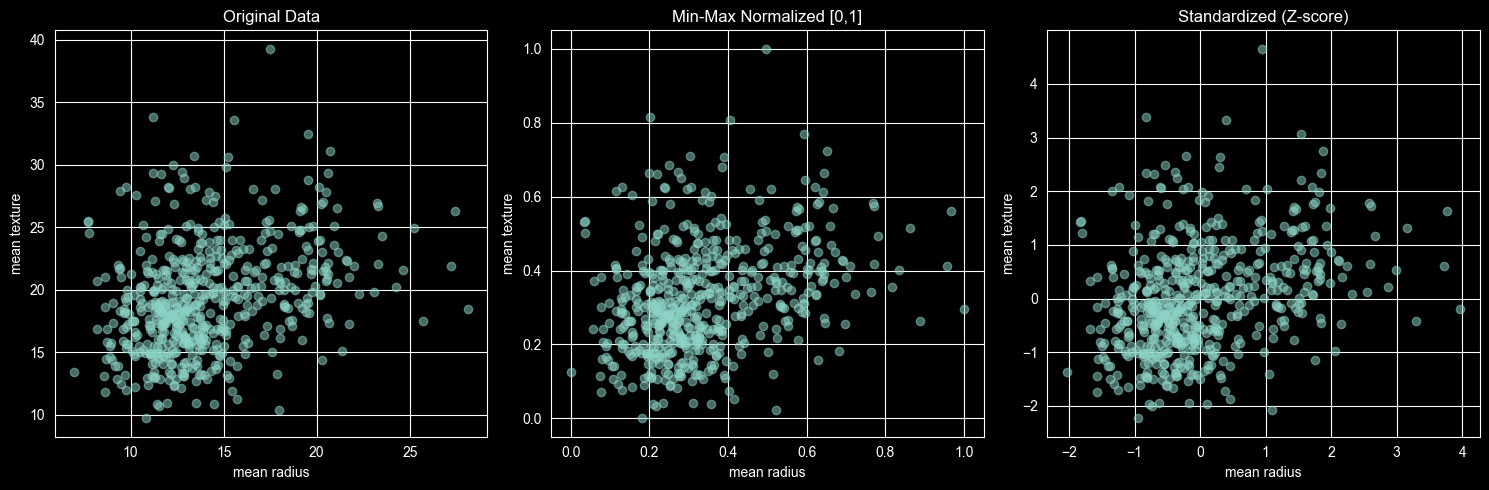

In [1]:
import sklearn.datasets as ds
import sklearn.preprocessing as pre
import pandas as pd
import matplotlib.pyplot as plt

# 1. Load the breast_cancer dataset
cancer = ds.load_breast_cancer()

# 2. Check data type, keys, and data dictionary
print(type(cancer))          # Bunch (dict-like object)
print(cancer.keys())         # dict_keys(['data', 'target', 'feature_names', ...])
print(cancer.DESCR)          # Full description of dataset

# 3. Extract input features and check data type
X = cancer.data
print(type(X))               # numpy.ndarray
print(X.shape)               # (569, 30) - 569 samples, 30 features

# 4. Extract feature names
feature_names = cancer.feature_names
print(feature_names)
print(len(feature_names))    # 30 features

# 5. Min-Max Normalization (scales to [0, 1])
scaler_minmax = pre.MinMaxScaler()
X_minmax = scaler_minmax.fit_transform(X)

# 6. Z-Normalization / Standardization (mean=0, std=1)
scaler_standard = pre.StandardScaler()
X_standard = scaler_standard.fit_transform(X)

# 7. Create DataFrames for easier analysis
df_original = pd.DataFrame(X, columns=feature_names)
df_minmax = pd.DataFrame(X_minmax, columns=feature_names)
df_standard = pd.DataFrame(X_standard, columns=feature_names)

# 8. Compare statistical metrics
print("Original Data")
print(df_original.describe())

print("\nMin-Max Normalized (expect min=0, max=1)")
print(df_minmax.describe())

print("\nStandardized (expect mean≈0, std≈1)")
print(df_standard.describe())

# 9. Visualize results with scatter plots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Select 2 features to plot
feature1 = 'mean radius'
feature2 = 'mean texture'

# Original data
axes[0].scatter(df_original[feature1], df_original[feature2], alpha=0.5)
axes[0].set_xlabel(feature1)
axes[0].set_ylabel(feature2)
axes[0].set_title('Original Data')

# Min-Max normalized
axes[1].scatter(df_minmax[feature1], df_minmax[feature2], alpha=0.5)
axes[1].set_xlabel(feature1)
axes[1].set_ylabel(feature2)
axes[1].set_title('Min-Max Normalized [0,1]')

# Standardized
axes[2].scatter(df_standard[feature1], df_standard[feature2], alpha=0.5)
axes[2].set_xlabel(feature1)
axes[2].set_ylabel(feature2)
axes[2].set_title('Standardized (Z-score)')

plt.tight_layout()
plt.show()